In [1]:
## For data
import pandas as pd
import numpy as np
## For plotting
import matplotlib.pyplot as plt
## For Arima
import pmdarima
import statsmodels.tsa.api as smt
## For Lstm
#from tensorflow.keras import models, layers, preprocessing as kprocessing
## For Prophet
from fbprophet import Prophet

import seaborn as sns
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(11, 4)})


In [2]:
dtf = pd.read_csv('C:\\Users\\garvi\\OneDrive\\Documents\\Nifty 50 Historical Data.csv',thousands=',')

dtf.head()

Date     Price      Open      High       Low     Vol. Change %
0  Jul 17, 2020  10901.70  10752.00  10933.45  10749.65  676.88K    1.51%
1  Jul 16, 2020  10739.95  10706.20  10755.30  10595.20  694.40K    1.15%
2  Jul 15, 2020  10618.20  10701.00  10827.45  10577.75  715.90K    0.10%
3  Jul 14, 2020  10607.35  10750.85  10755.65  10562.90  532.37K   -1.81%
4  Jul 13, 2020  10802.70  10851.85  10894.05  10756.05  554.05K    0.32%

In [3]:
dtf.describe()

Price          Open          High           Low
count   2854.000000   2854.000000   2854.000000   2854.000000
mean    7559.703048   7564.699229   7607.052961   7511.518676
std     2409.058418   2414.255461   2415.876553   2404.185410
min     2573.150000   2574.500000   2621.250000   2539.450000
25%     5456.137500   5456.262500   5495.200000   5414.075000
50%     7619.150000   7636.050000   7678.650000   7580.650000
75%     9615.825000   9617.312500   9646.200000   9576.712500
max    12362.300000  12430.500000  12430.500000  12321.400000

In [4]:
dtf["Date"] = pd.to_datetime(dtf["Date"],infer_datetime_format=True)

dtf =dtf.iloc[::-1]



In [5]:
# Rename the features: These names are NEEDED for the model fitting
dtf = dtf[["Date","Price"]]
dtf = dtf.rename(columns = {"Date":"ds","Price":"y"}) #renaming the columns of the dataset

In [6]:
# Create Time Series


#ts.head()
#ts.tail()
#ts.count()

In [7]:
dtf.head()

ds        y
2853 2009-01-01  3033.45
2852 2009-01-02  3046.75
2851 2009-01-05  3121.45
2850 2009-01-06  3112.80
2849 2009-01-07  2920.40

In [8]:
m = Prophet(daily_seasonality = True) # the Prophet class (model)
m.fit(dtf) # fit the model using all data

INFO:numexpr.utils:NumExpr defaulting to 8 threads.


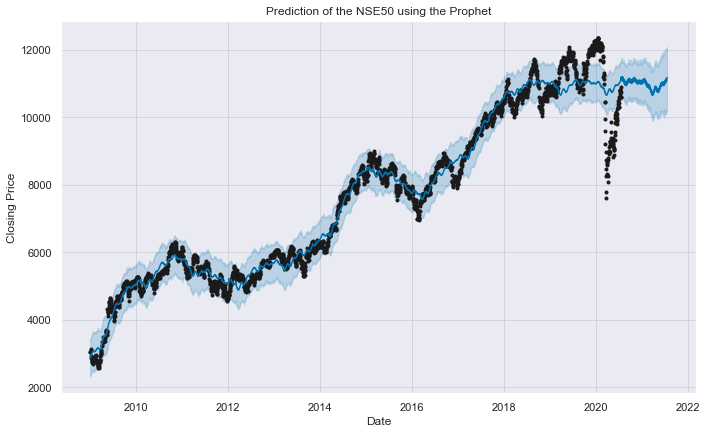

In [9]:
future = m.make_future_dataframe(periods=365) #we need to specify the number of days in future
prediction = m.predict(future)
m.plot(prediction)
plt.title("Prediction of the NSE50 using the Prophet")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.show()

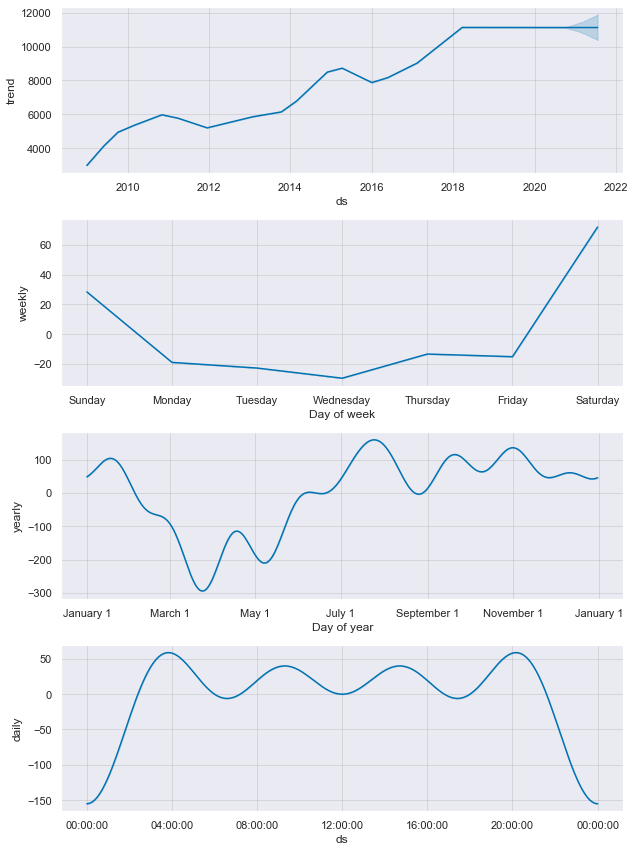

In [10]:
m.plot_components(prediction)
plt.show()

In [11]:
# selecting Date till 2018 for training and 2018-2019 as testing
train = (dtf['ds'] <'2018-12-31') 
train = dtf.loc[train]
test =  (dtf['ds'] >'2018-12-31') & (dtf['ds']<'2019-12-31')
test = dtf.loc[test]

In [12]:
train.head()


ds        y
2853 2009-01-01  3033.45
2852 2009-01-02  3046.75
2851 2009-01-05  3121.45
2850 2009-01-06  3112.80
2849 2009-01-07  2920.40

In [13]:
train.tail()

ds         y
384 2018-12-21  10754.00
383 2018-12-24  10663.50
382 2018-12-26  10729.85
381 2018-12-27  10779.80
380 2018-12-28  10859.90

In [14]:
test.head()

ds         y
378 2019-01-01  10910.10
377 2019-01-02  10792.50
376 2019-01-03  10672.25
375 2019-01-04  10727.35
374 2019-01-07  10771.80

In [15]:
test.tail()

ds         y
140 2019-12-23  12262.75
139 2019-12-24  12214.55
138 2019-12-26  12126.55
137 2019-12-27  12245.80
136 2019-12-30  12255.85

In [16]:
#Fit model using train data
model = Prophet(daily_seasonality = True) # the Prophet class (model)
model.fit(train) # fit the model using all data

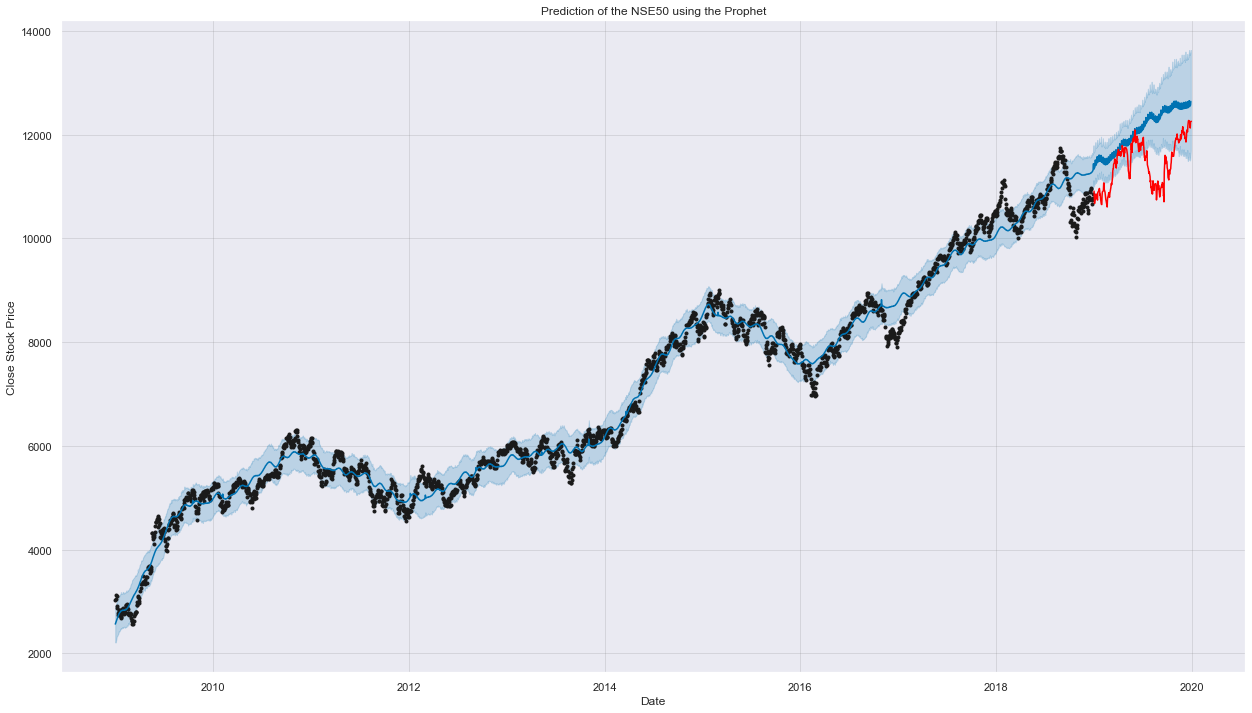

In [69]:
future = model.make_future_dataframe(periods=365) #we need to specify the number of days in future
prediction = model.predict(future)
model.plot(prediction)
plt.title("Prediction of the NSE50 using the Prophet")
plt.xlabel("Date")
plt.ylabel("Close Stock Price")
plt.plot(test['ds'],test['y'],color='red')
#plt.savefig('myfig.png')
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
fig.savefig('test2png.png', dpi=300)
plt.show()


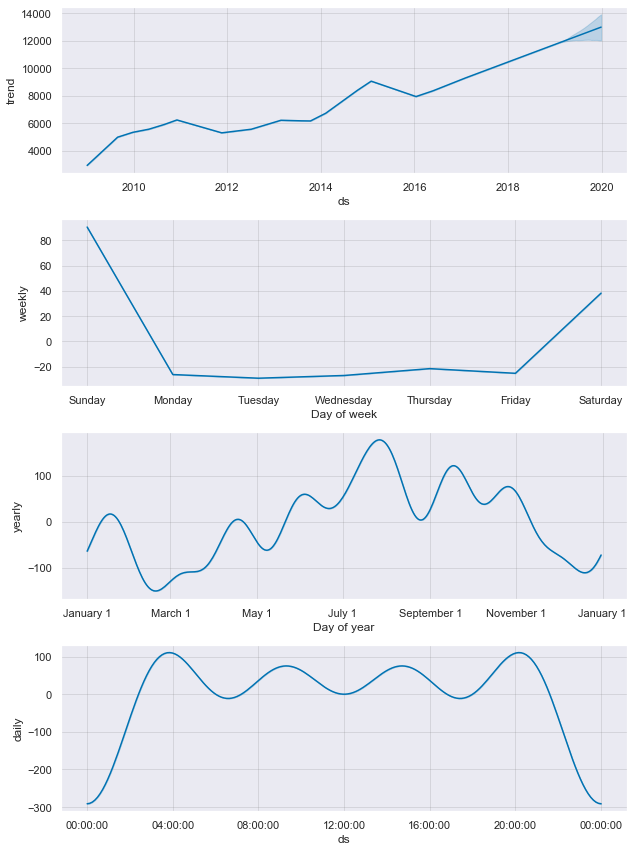

In [18]:
model.plot_components(prediction)
plt.show()

In [19]:
from fbprophet.plot import plot_plotly
import plotly.offline as py
py.init_notebook_mode()
fig = plot_plotly(model, prediction)

py.iplot(fig)

TypeError: add_trace() missing 1 required positional argument: 'trace'

NameError: name 'random_x' is not defined

In [29]:
prediction

ds         trend    yhat_lower    yhat_upper   trend_lower  \
0    2009-01-01   2943.521290   2194.956970   2894.937287   2943.521290   
1    2009-01-02   2952.159792   2265.675912   2908.481161   2952.159792   
2    2009-01-05   2978.075296   2282.234443   2956.714059   2978.075296   
3    2009-01-06   2986.713797   2322.204560   2971.713286   2986.713797   
4    2009-01-07   2995.352299   2338.185308   2973.376859   2995.352299   
...         ...           ...           ...           ...           ...   
2834 2019-12-24  12970.571918  11519.645390  13469.350004  12031.793694   
2835 2019-12-25  12974.056211  11552.648101  13522.472830  12032.210283   
2836 2019-12-26  12977.540504  11560.381352  13601.371069  12026.731143   
2837 2019-12-27  12981.024797  11554.343552  13550.206436  12021.888026   
2838 2019-12-28  12984.509090  11612.589989  13638.205964  12021.086158   

       trend_upper  additive_terms  additive_terms_lower  \
0      2943.521290     -376.461404           -376.461404   
1      2952.159792     -373.365924           -373.365924   
2      2978.075296     -353.335151           -353.335151   
3      2986.713797     -349.300882           -349.300882   
4      2995.352299     -340.416249           -340.416249   
...            ...             ...                   ...   
2834  13890.115244     -426.027654           -426.027654   
2835  13897.063763     -421.196228           -421.196228   
2836  13904.012282     -412.481718           -412.481718   
2837  13910.281218     -412.287837           -412.287837   
2838  13918.281264     -344.297070           -344.297070   

      additive_terms_upper       daily  ...     weekly  weekly_lower  \
0              -376.461404 -291.144003  ... -21.516761    -21.516761   
1              -373.365924 -291.144003  ... -25.212056    -25.212056   
2              -353.335151 -291.144003  ... -26.199690    -26.199690   
3              -349.300882 -291.144003  ... -29.090822    -29.090822   
4              -340.416249 -291.144003  ... -26.939631    -26.939631   
...                    ...         ...  ...        ...           ...   
2834           -426.027654 -291.144003  ... -29.090822    -29.090822   
2835           -421.196228 -291.144003  ... -26.939631    -26.939631   
2836           -412.481718 -291.144003  ... -21.516761    -21.516761   
2837           -412.287837 -291.144003  ... -25.212056    -25.212056   
2838           -344.297070 -291.144003  ...  38.316493     38.316493   

      weekly_upper      yearly  yearly_lower  yearly_upper  \
0       -21.516761  -63.800639    -63.800639    -63.800639   
1       -25.212056  -57.009865    -57.009865    -57.009865   
2       -26.199690  -35.991458    -35.991458    -35.991458   
3       -29.090822  -29.066056    -29.066056    -29.066056   
4       -26.939631  -22.332615    -22.332615    -22.332615   
...            ...         ...           ...           ...   
2834    -29.090822 -105.792828   -105.792828   -105.792828   
2835    -26.939631 -103.112594   -103.112594   -103.112594   
2836    -21.516761  -99.820954    -99.820954    -99.820954   
2837    -25.212056  -95.931778    -95.931778    -95.931778   
2838     38.316493  -91.469560    -91.469560    -91.469560   

      multiplicative_terms  multiplicative_terms_lower  \
0                      0.0                         0.0   
1                      0.0                         0.0   
2                      0.0                         0.0   
3                      0.0                         0.0   
4                      0.0                         0.0   
...                    ...                         ...   
2834                   0.0                         0.0   
2835                   0.0                         0.0   
2836                   0.0                         0.0   
2837                   0.0                         0.0   
2838                   0.0                         0.0   

      multiplicative_terms_upper          yhat  
0                            0.0   

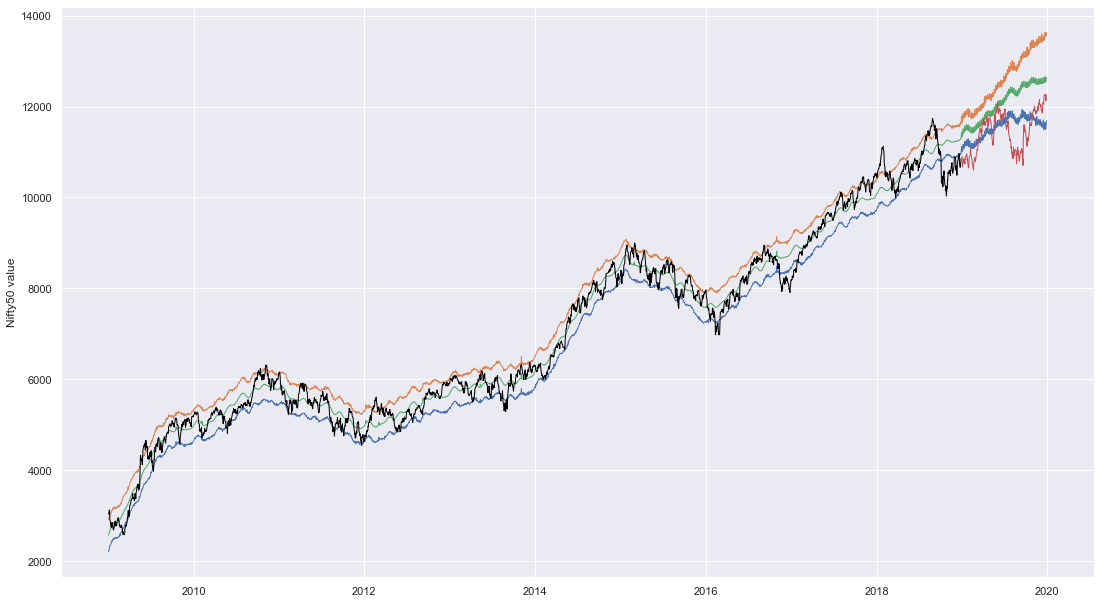

In [82]:
plt.plot(prediction['ds'], prediction[['yhat_lower','yhat_upper','yhat']],linewidth=1.0)
plt.ylabel('Nifty50 value')
plt.plot(train['ds'],train['y'],color='black',linewidth=1.0)
plt.plot(test['ds'],test['y'],linewidth=1.0)
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.plot()
plt.show()

In [86]:
def fit_prophet(train, test, lst_exog=None, model=None, 
                freq="D", figsize=(15,10)):
    ## train
    model2 = Prophet(daily_seasonality = True) # the Prophet class (model)
    model2.fit(train)
    
    ## test
    dtf_prophet = model.make_future_dataframe(periods=len(test), 
                  freq=freq, include_history=True)
    dtf_prophet = model.predict(dtf_prophet)
    train = train.merge(dtf_prophet[["ds","yhat"]], 
                how="left").rename(columns={'yhat':'model', 
                'y':'ts'}).set_index("ds")
    test = test.merge(dtf_prophet[["ds","yhat"]], 
                how="left").rename(columns={'yhat':'forecast',  
                'y':'ts'}).set_index("ds")
    
    ## evaluate
    dtf = train.append(test)
    dtf = utils_evaluate_forecast(dtf, figsize=figsize, 
                                  title="Prophet")
    return dtf, model

In [88]:
def utils_evaluate_forecast(dtf, title, plot=True, figsize=(20,13)):
    try:
        ## residuals
        dtf["residuals"] = dtf["ts"] - dtf["model"]
        dtf["error"] = dtf["ts"] - dtf["forecast"]
        dtf["error_pct"] = dtf["error"] / dtf["ts"]
        
        ## kpi
        residuals_mean = dtf["residuals"].mean()
        residuals_std = dtf["residuals"].std()
        error_mean = dtf["error"].mean()
        error_std = dtf["error"].std()
        mae = dtf["error"].apply(lambda x: np.abs(x)).mean()
        mape = dtf["error_pct"].apply(lambda x: np.abs(x)).mean()  
        mse = dtf["error"].apply(lambda x: x**2).mean()
        rmse = np.sqrt(mse)  #root mean squared error
        
        ## intervals
        dtf["conf_int_low"] = dtf["forecast"] - 1.96*residuals_std
        dtf["conf_int_up"] = dtf["forecast"] + 1.96*residuals_std
        dtf["pred_int_low"] = dtf["forecast"] - 1.96*error_std
        dtf["pred_int_up"] = dtf["forecast"] + 1.96*error_std
        
        ## plot
        if plot==True:
            fig = plt.figure(figsize=figsize)
            fig.suptitle(title, fontsize=20)   
            ax1 = fig.add_subplot(2,2, 1)
            ax2 = fig.add_subplot(2,2, 2, sharey=ax1)
            ax3 = fig.add_subplot(2,2, 3)
            ax4 = fig.add_subplot(2,2, 4)
            ### training
            dtf[pd.notnull(dtf["model"])][["ts","model"]].plot(color=["black","green"], title="Model", grid=True, ax=ax1)      
            ax1.set(xlabel=None)
            ### test
            dtf[pd.isnull(dtf["model"])][["ts","forecast"]].plot(color=["black","red"], title="Forecast", grid=True, ax=ax2)
            ax2.fill_between(x=dtf.index, y1=dtf['pred_int_low'], y2=dtf['pred_int_up'], color='b', alpha=0.2)
            ax2.fill_between(x=dtf.index, y1=dtf['conf_int_low'], y2=dtf['conf_int_up'], color='b', alpha=0.3)     
            ax2.set(xlabel=None)
            ### residuals
            dtf[["residuals","error"]].plot(ax=ax3, color=["green","red"], title="Residuals", grid=True)
            ax3.set(xlabel=None)
            ### residuals distribution
            dtf[["residuals","error"]].plot(ax=ax4, color=["green","red"], kind='kde', title="Residuals Distribution", grid=True)
            ax4.set(ylabel=None)
            plt.show()
            print("Training --> Residuals mean:", np.round(residuals_mean), " | std:", np.round(residuals_std))
            print("Test --> Error mean:", np.round(error_mean), " | std:", np.round(error_std),
                  " | mae:",np.round(mae), " | mape:",np.round(mape*100), "%  | mse:",np.round(mse), " | rmse:",np.round(rmse))
        
        return dtf[["ts","model","residuals","conf_int_low","conf_int_up", 
                    "forecast","error","pred_int_low","pred_int_up"]]
    
    except Exception as e:
        print("--- got error ---")
        print(e)

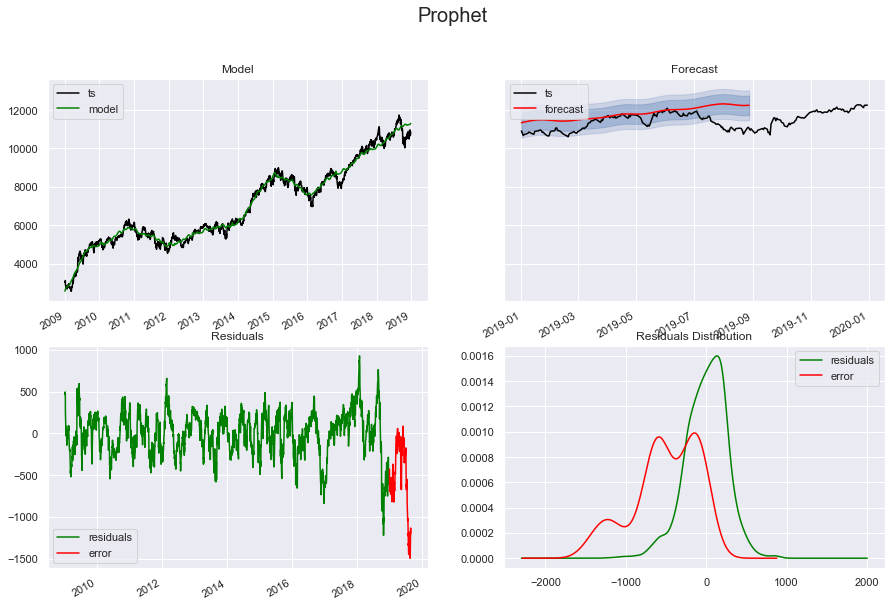

Training --> Residuals mean: -0.0  | std: 260.0
Test --> Error mean: -502.0  | std: 399.0  | mae: 504.0  | mape: 5.0 %  | mse: 409786.0  | rmse: 640.0


In [89]:
dtf, model = fit_prophet(train, test, model=model, freq="D")